Apollo Hospitals - Hypothesis Testing

Problem statement -- >>

What are the parameters that affect the hospitalization of patients and what can be done to reduce the same.

How well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency



In [3]:
df = pd.read_csv("scaler_apollo_hospitals.csv")

In [4]:
df.shape

(1338, 8)

In [5]:
df.head(7)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601


In [8]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [16]:
# find all the duplicated rows
df[df.duplicated()]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


In [18]:
df[df.duplicated(keep=False)]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
195,19,male,no,northwest,10.2,0,4099
581,19,male,no,northwest,10.2,0,4099


In [19]:
df.drop_duplicates(keep='first' , inplace=True) # dropping duplicates

In [21]:
df.reset_index(inplace=True,drop=True)

Column Profiling

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female

Viral Load: Viral load refers to the amount of virus in an infected person's blood

Severity Level: This is an integer indicating how severe the patient is

Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest

Hospitalization charges: Individual medical costs billed to health insurance


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1337 non-null   int64  
 1   sex                      1337 non-null   object 
 2   smoker                   1337 non-null   object 
 3   region                   1337 non-null   object 
 4   viral load               1337 non-null   float64
 5   severity level           1337 non-null   int64  
 6   hospitalization charges  1337 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.2+ KB


In [32]:
# convert object to categorical
for i in df.select_dtypes(object).columns:
    df[i] = df[i].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1337 non-null   int64   
 1   sex                      1337 non-null   category
 2   smoker                   1337 non-null   category
 3   region                   1337 non-null   category
 4   viral load               1337 non-null   float64 
 5   severity level           1337 non-null   int64   
 6   hospitalization charges  1337 non-null   int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 46.3 KB


In [34]:
df["severity level"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [39]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,10.221249,1.095737,33197.806283
std,14.044333,2.033556,1.205571,30275.900411
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.760000,0.000000,11866.000000
50%,39.000000,10.130000,1.000000,23465.000000
75%,51.000000,11.570000,2.000000,41644.000000
max,64.000000,17.710000,5.000000,159426.000000


C:\Users\mahik\AppData\Local\Temp\ipykernel_380\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

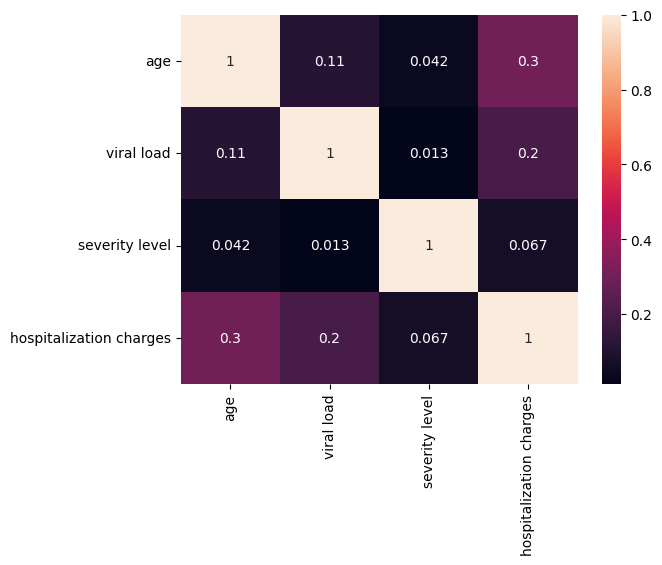

In [40]:
sns.heatmap(df.corr(),annot=True)

None of the columns are correlated with each other

In [49]:
# print max and min age 
print("max_age :",df["age"].max())
print("min_age :",df["age"].min())

max_age : 64
min_age : 18


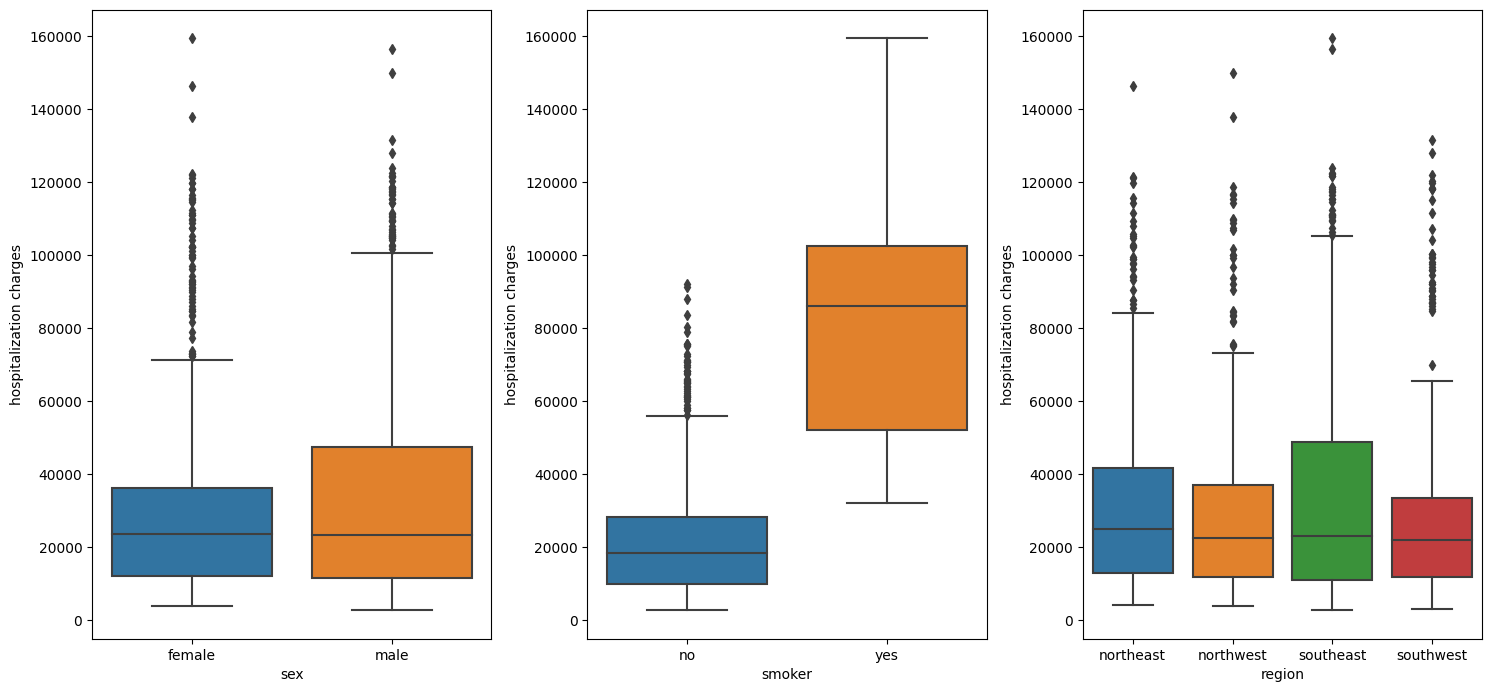

In [52]:
# checking outliers
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="hospitalization charges")
    plt.tight_layout(pad=1)


In [53]:
df.describe(include="category").T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


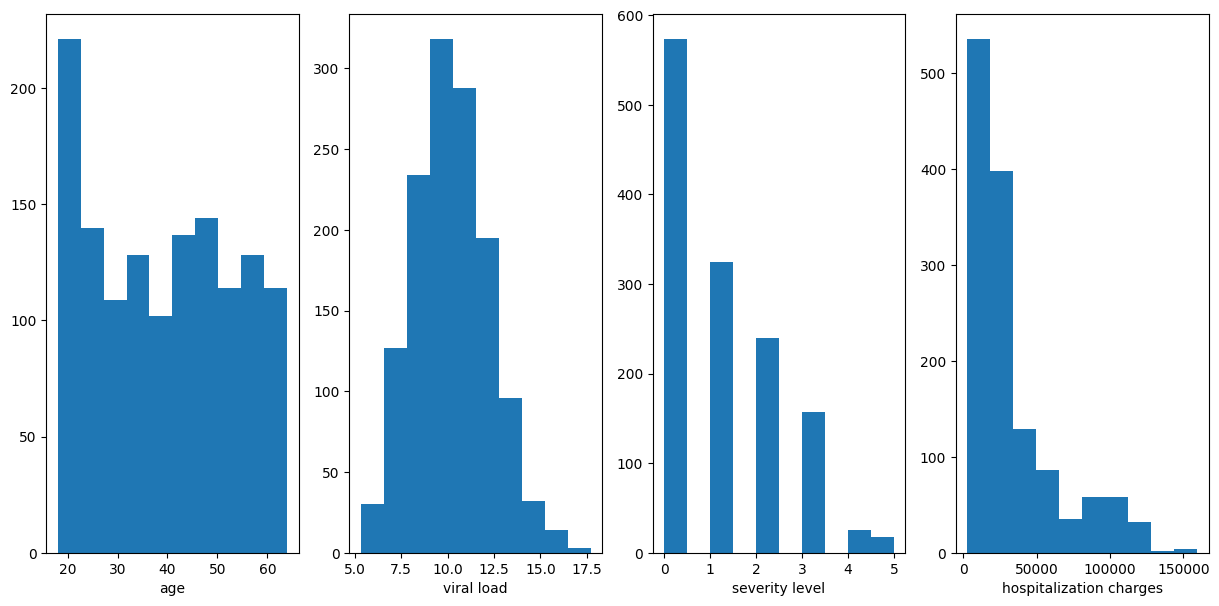

In [60]:
# dist plots
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes(include=["int64", "float64"]).columns[:4]):
    plt.subplot(1,4,i+1)
    plt.subplots_adjust(hspace=0.8)
    plt.hist(df[j])
    plt.xlabel(j)


We could see form the above that the distribution of hospitalization charges is right skewed and it has outliers when plotted with catogerical columns , let's remove the outliers for the numerical columns

In [62]:
df.select_dtypes(np.number).columns

Index(['age', 'viral load', 'severity level', 'hospitalization charges'], dtype='object')

Outlier- treatment 

In [63]:
for i,j in enumerate(df.select_dtypes(np.number).columns):
    # lower and upper quantiles 
    q1 = df[j].quantile(0.25)
    q3 = df[j].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f"{j} : {df[(df[j] < lower_bound) | (df[j] > upper_bound)].shape[0]}")

age : 0
viral load : 9
severity level : 0
hospitalization charges : 139


In [65]:
for i,j in enumerate(df.select_dtypes(np.number).columns):
    # lower and upper quantiles 
    q1 = df[j].quantile(0.25)
    q3 = df[j].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr) 
    # removing outliers
    df = df[(df[j] >= lower_bound) & (df[j] <= upper_bound)]


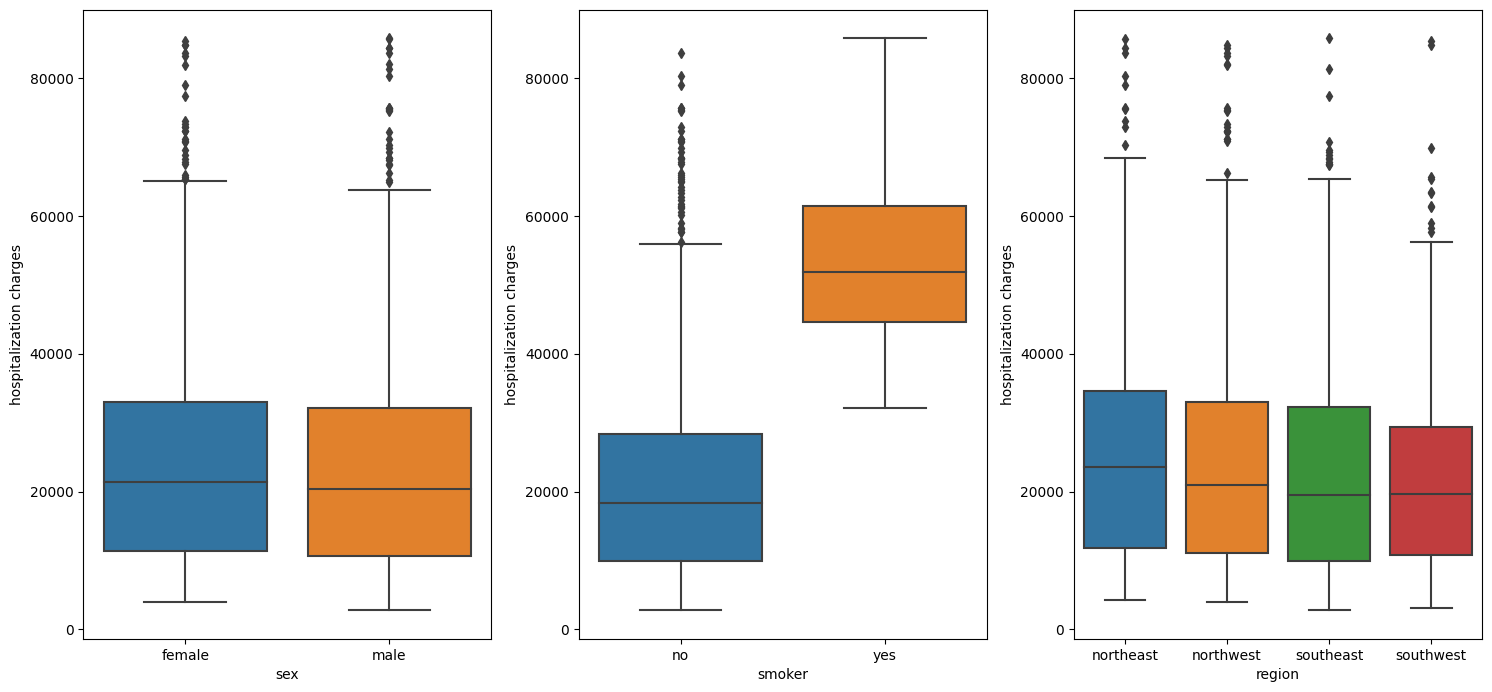

In [66]:

plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="hospitalization charges")
    plt.tight_layout(pad=1)


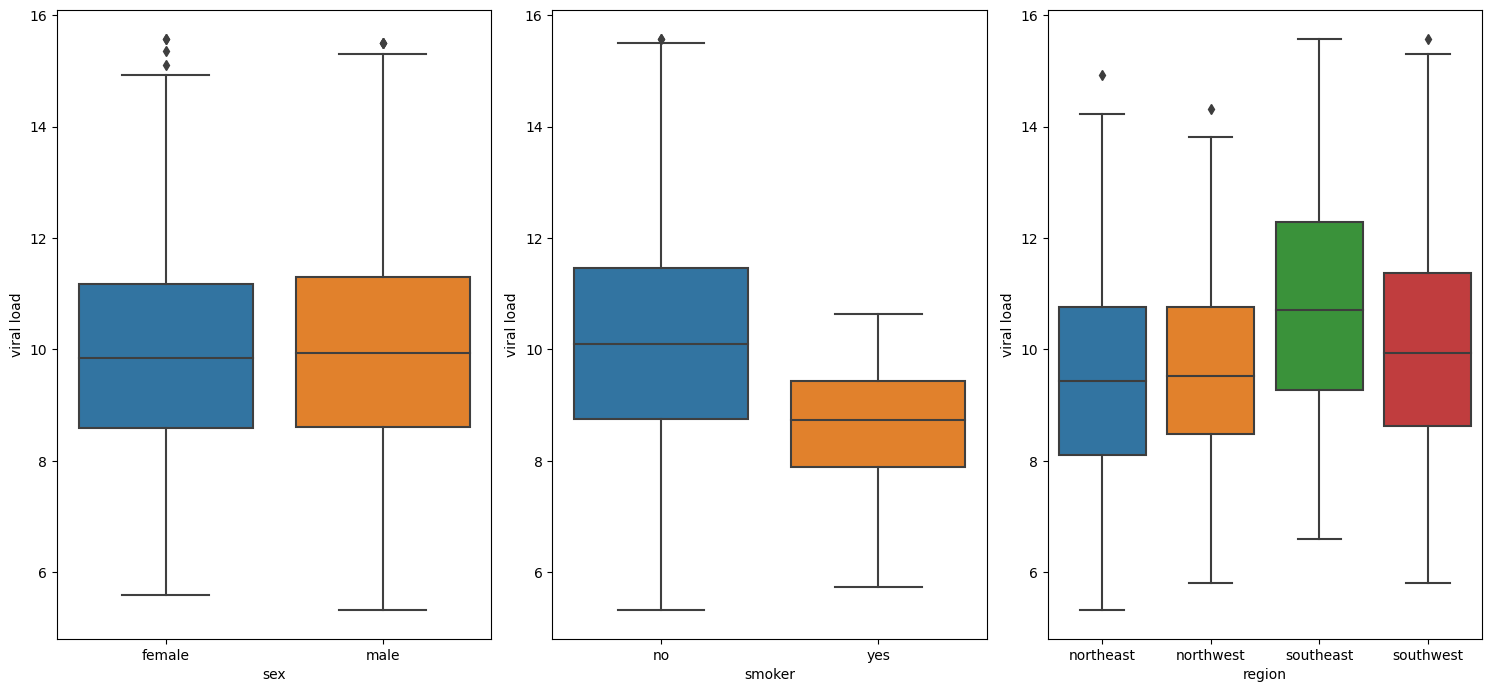

In [67]:
# lets check with viralload and severity and age 

plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="viral load")
    plt.tight_layout(pad=1)


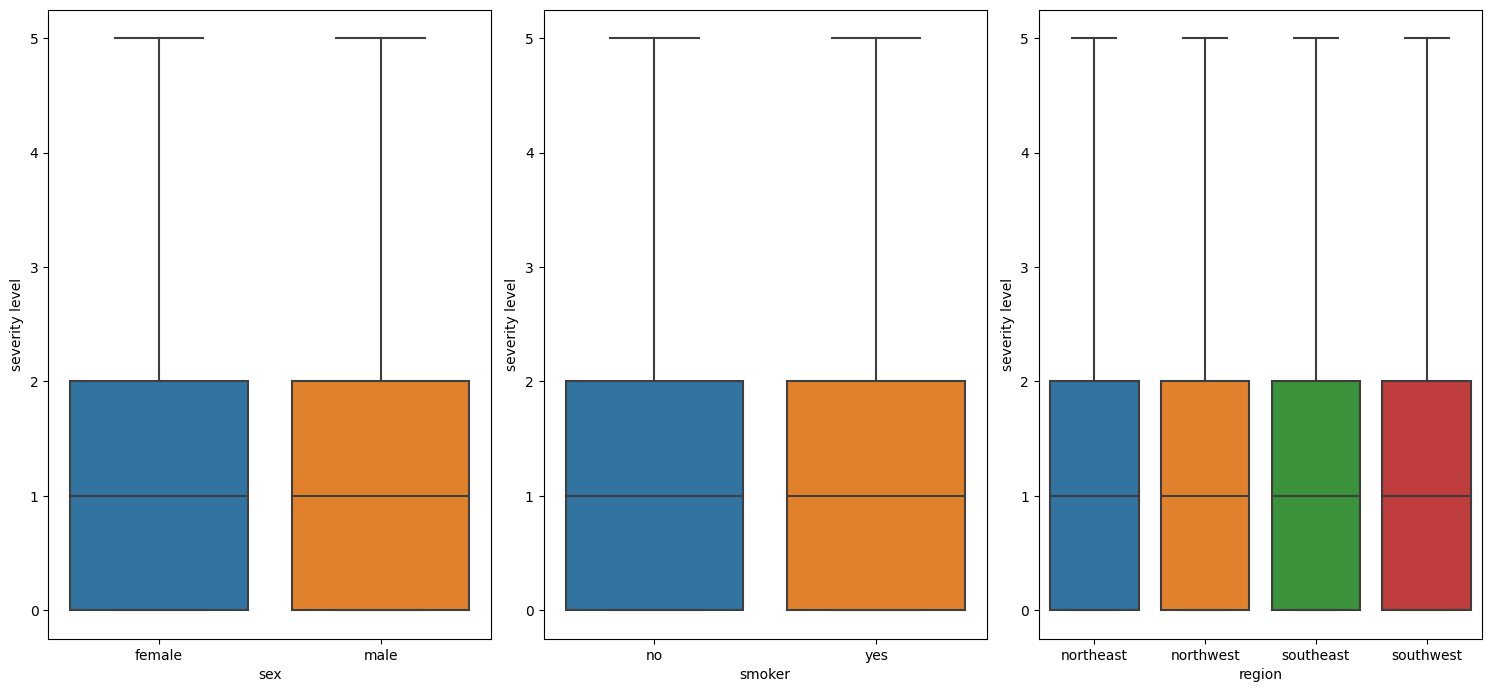

In [68]:
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="severity level")
    plt.tight_layout(pad=1)


C:\Users\mahik\AppData\Local\Temp\ipykernel_380\3905190810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<AxesSubplot: >

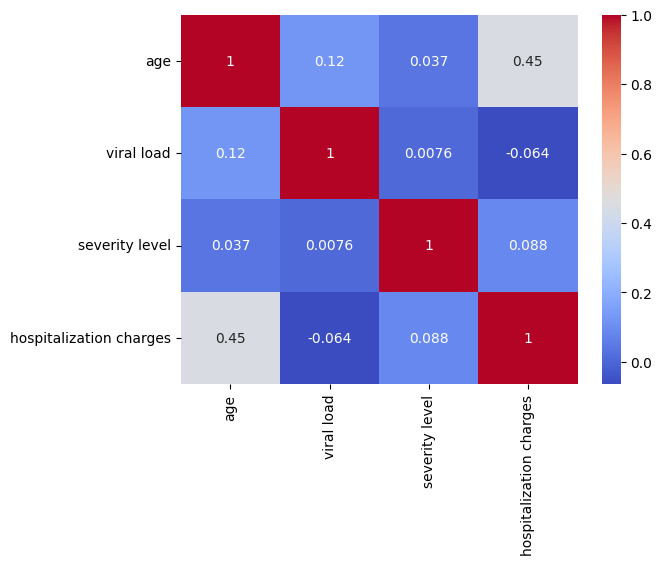

In [69]:
# after removal of outliers let's check the correlation 
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

Now We could observe that age is starting to be correlated with hospitalization charges

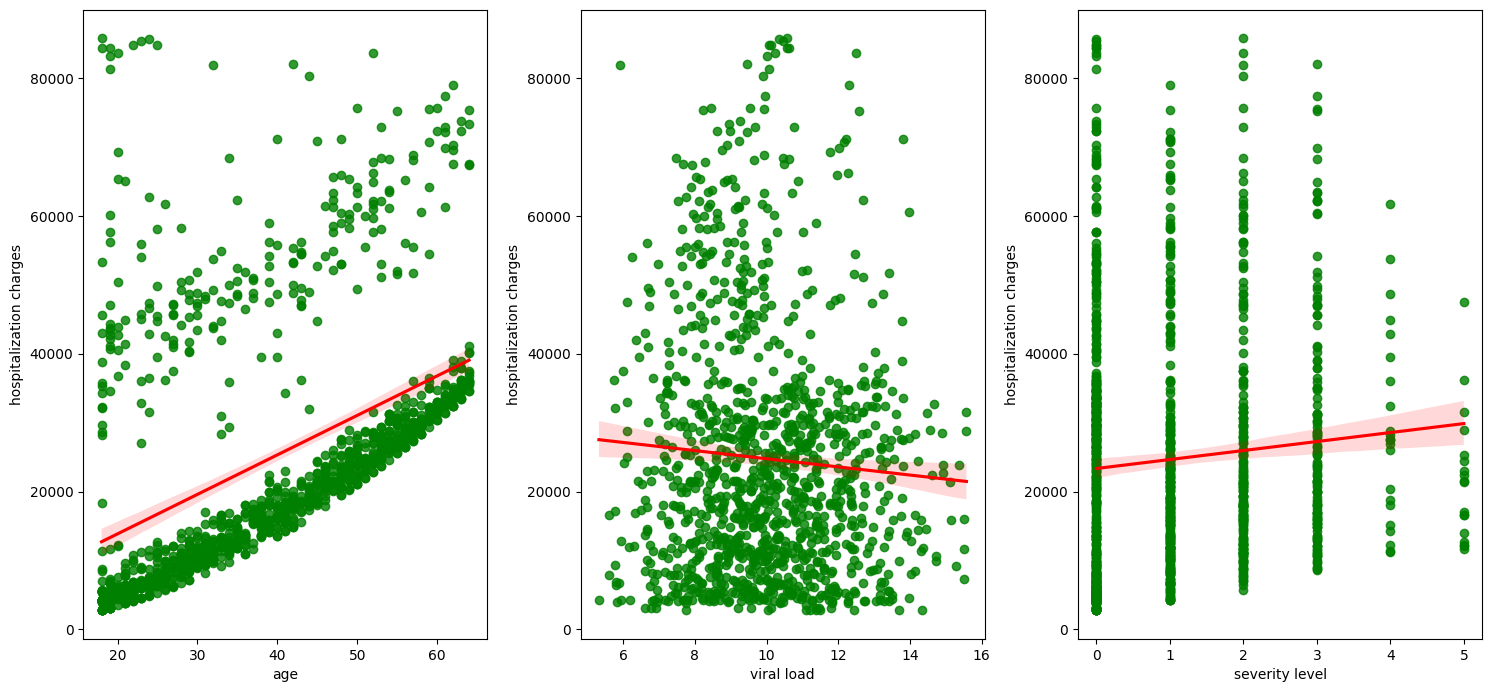

In [84]:
# for col in df.select_dtypes(include=["int64", "float64"]).columns:
#     sns.lmplot(data=df, x=col, y="hospitalization charges", height=5, aspect=0.7)
#     plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,7))
for i, j in enumerate(df.select_dtypes(np.number).columns[:-1]):
    sns.regplot(data=df, x=j, y="hospitalization charges", ax=axs[i],color="green",line_kws={'color':'red'})
plt.tight_layout(pad=1)
plt.show()

Since Age has slight correlation let's bin the age column and see if it has any effect on hospitalization charges

In [87]:

#  let's bin the age column 
bins = [17,28,38,48,58,68]
labels = ["17-27","28-37","38-47","48-57","58-67"] 
df["age_bin"] = pd.cut(df["age"], bins=bins, labels=labels)

df["age_bin"].value_counts()

17-27    353
48-57    248
38-47    242
28-37    229
58-67    118
Name: age_bin, dtype: int64

<AxesSubplot: xlabel='age_bin', ylabel='hospitalization charges'>

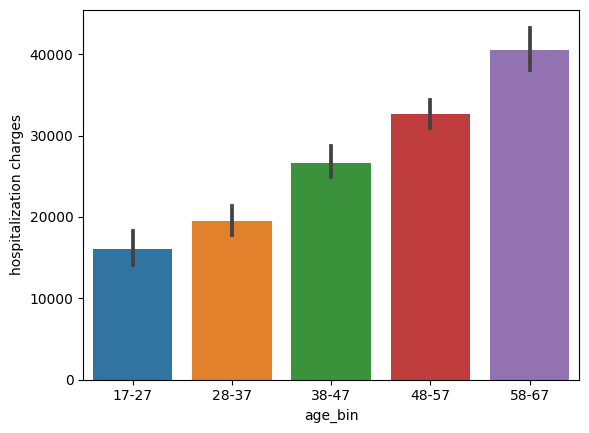

In [93]:
# bar plot for age vs hospitalization charges
sns.barplot(data=df,x="age_bin",y="hospitalization charges")

<AxesSubplot: xlabel='age_bin', ylabel='hospitalization charges'>

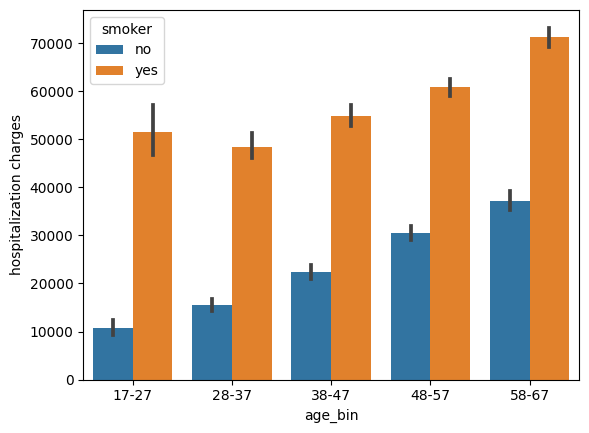

In [94]:
sns.barplot(data=df,x="age_bin",y="hospitalization charges",hue="smoker")

##### from the bar plot we ca assume that as age increases hospitalization charges also increases because generally older patients tned to visit hospitals more and could have more charges and irrespective of age , smokers have higher hospitalization charges

<AxesSubplot: xlabel='sex', ylabel='hospitalization charges'>

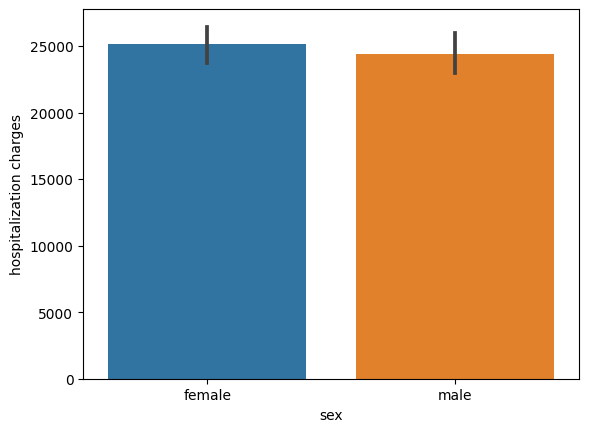

In [95]:
# geneder vs hospitalization charges
sns.barplot(data=df,x="sex",y="hospitalization charges") 

If we observe closely the average hospitalization charges for females are slightly higher than males this might be becuase of child birth (assumption). 
Let's look at smoker distribution

<AxesSubplot: xlabel='sex', ylabel='hospitalization charges'>

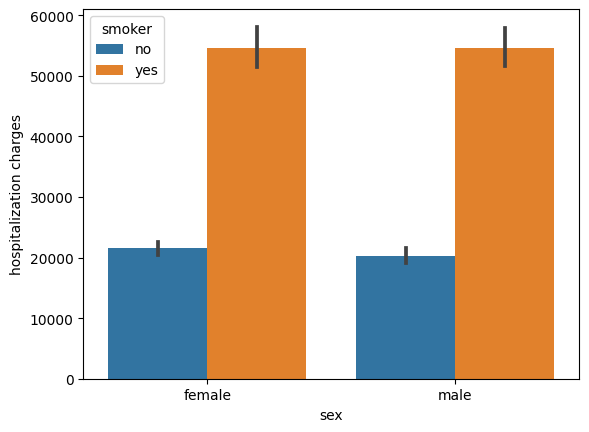

In [96]:
sns.barplot(data=df,x="sex",y="hospitalization charges",hue="smoker")

In [99]:
df["smoker"].value_counts()

no     1054
yes     136
Name: smoker, dtype: int64

<AxesSubplot: xlabel='region', ylabel='count'>

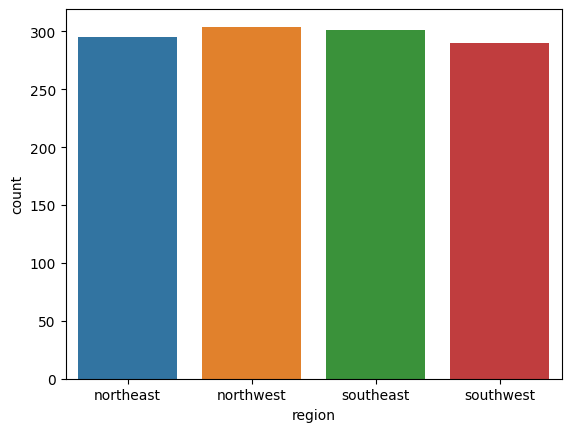

In [101]:
sns.countplot(data=df,x="region")

<AxesSubplot: xlabel='region', ylabel='hospitalization charges'>

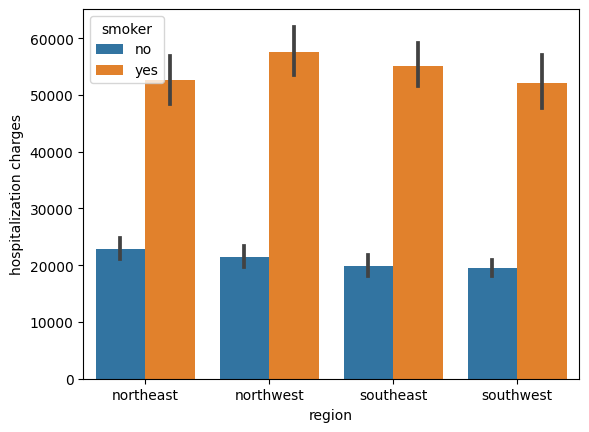

In [102]:
# region vs hospitalization charges
sns.barplot(data=df,x="region",y="hospitalization charges",hue="smoker")

In [105]:
df["severity level"].value_counts()

0    517
1    289
2    205
3    138
4     23
5     18
Name: severity level, dtype: int64

<AxesSubplot: xlabel='severity level', ylabel='count'>

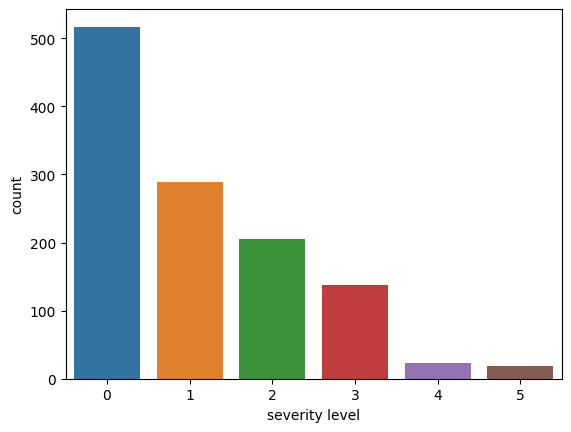

In [104]:
sns.countplot(data=df,x="severity level")

<AxesSubplot: xlabel='severity level', ylabel='count'>

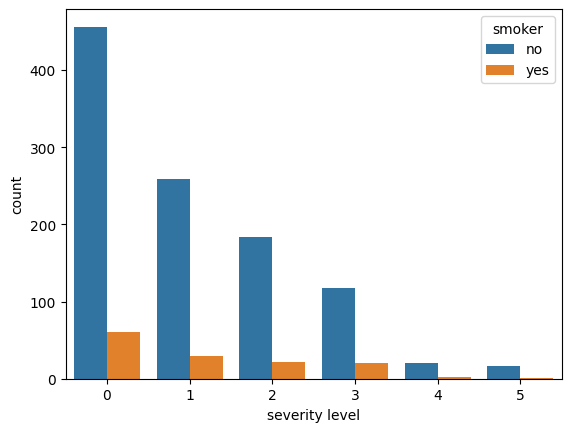

In [111]:
sns.countplot(data=df,x="severity level",hue="smoker")

We can assume that even though as severity level increases the total smoker population decreases however their hospitalization charge still increases.

<AxesSubplot: xlabel='severity level', ylabel='hospitalization charges'>

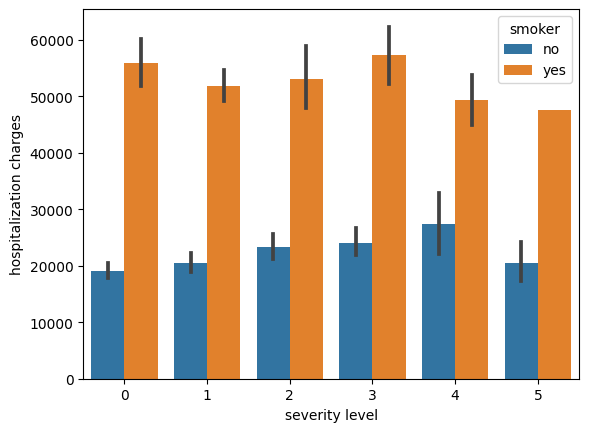

In [107]:
sns.barplot(data=df,x="severity level",y="hospitalization charges",hue="smoker")

<AxesSubplot: xlabel='severity level', ylabel='viral load'>

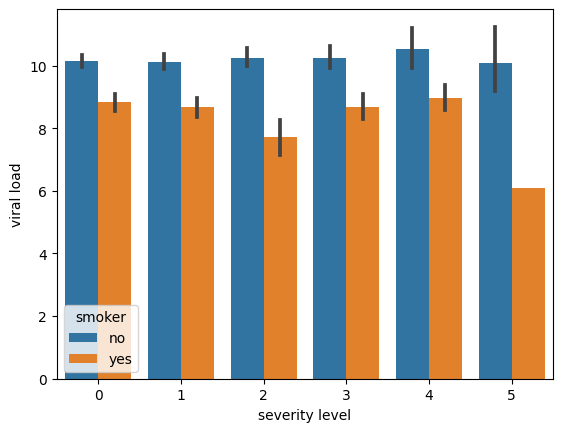

In [113]:
# viral load vs severity level
sns.barplot(data=df,x="severity level",y="viral load",hue="smoker")

In [114]:
# max and min viral load  
print("max_viral_load :",df["viral load"].max())
print("min_viral_load :",df["viral load"].min())

max_viral_load : 15.58
min_viral_load : 5.32


<AxesSubplot: xlabel='severity level', ylabel='count'>

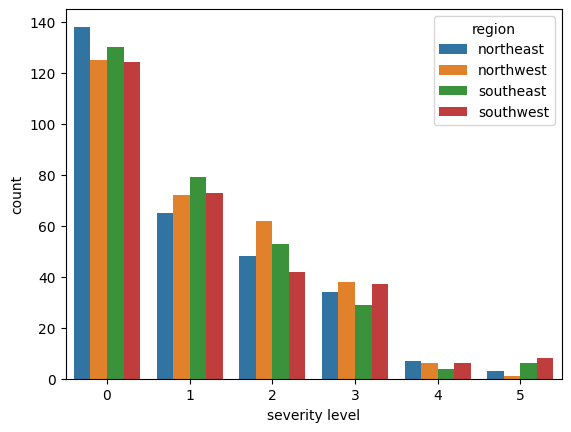

In [115]:
# severity level vs region 
sns.countplot(data=df,x="severity level",hue="region")

<AxesSubplot: xlabel='severity level', ylabel='age'>

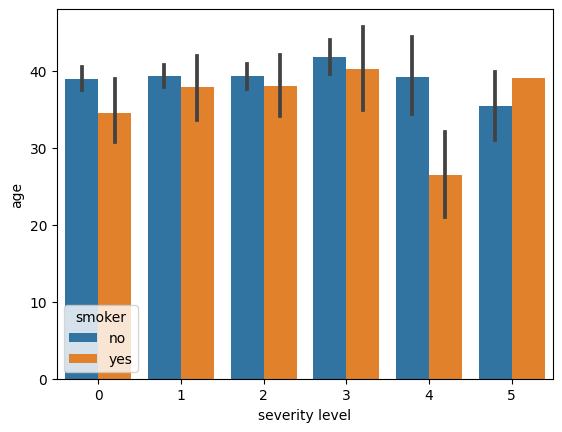

In [117]:
# severity vs age
sns.barplot(data=df,x="severity level",y="age", hue="smoker")

### Hypothesis testing 

Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?

In [118]:
# we saw in our preliminary analysis that smoking affects the hospitalization charges 

df.groupby("smoker")["hospitalization charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1054.0,20923.919355,14560.760875,2805.0,9971.25,18328.5,28389.75,83680.0
yes,136.0,54578.154412,13360.849267,32074.0,44663.50,51899.5,61421.50,85758.0


Even though non -smokers are 7X times smokers , the avg hospitalization charges for smokers is pretty high compared to non-smokers.

H0 : 𝜇1 <= 𝜇2 The avg charges of smokers is less than or equal to Non - smokers 

H1 : 𝜇1 > 𝜇2 The avg charges for smokers is grater than non smokers 

significance level = 0.05  

Population standard devialtion is unknown , and the test is right tailed test -- T test


NameError: name 'df' is not defined